# MATH 210 Introduction to Mathematical Computing

**March 31, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Least Squares Linear Regression

Create a fake dataset using random number generators.

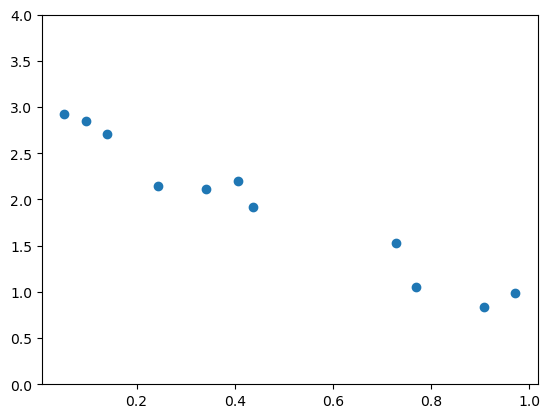

In [3]:
N = 10
x = np.random.rand(N+1)
noise = 0.2*np.random.randn(N+1)
y = 3 - 2.2*x + noise
plt.scatter(x,y)
plt.ylim([0,4])
plt.show()

We want to solve the normal equations $A^T A \mathbf{c} = A^T \mathbf{y}$ to recover the coefficients $c_0 = 3$ and $c_1 = -2.2$.

In [4]:
A = np.column_stack([np.ones(N+1),x])
c = la.solve(A.T@A,A.T@y)

In [5]:
c

array([ 2.95265604, -2.20368687])

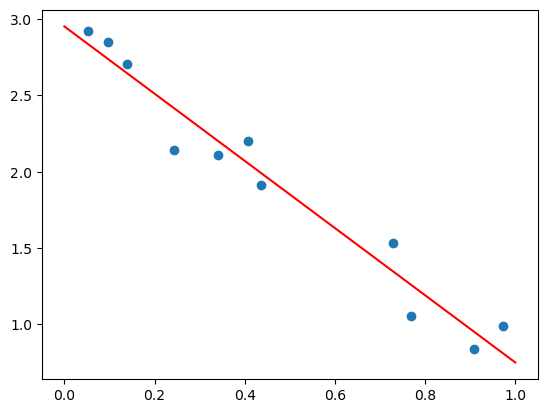

In [6]:
xs = np.linspace(0,1,50)
ys = c[0] + c[1]*xs

plt.plot(xs,ys,'r')
plt.scatter(x,y)
plt.show()

## Data Fitting

Create fake quadratic data:

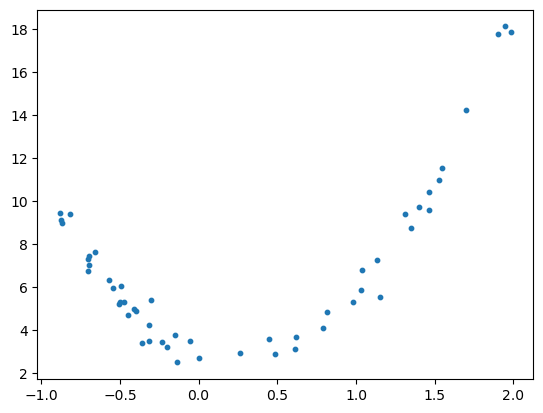

In [7]:
N = 50
x = 3*np.random.rand(N+1) - 1
noise = 0.5*np.random.randn(N+1)
y = 3 - 2.2*x + 5*x**2 + noise

plt.scatter(x,y,s=10)
plt.show()

We assume the model is $f(x) = c_0 + c_1 x + c_2 x^2$.

In [8]:
A = np.column_stack([np.ones(N+1),x,x**2])
A[:5,:]

array([[ 1.00000000e+00, -7.03053589e-01,  4.94284348e-01],
       [ 1.00000000e+00, -6.55399330e-01,  4.29548282e-01],
       [ 1.00000000e+00,  4.45850285e-01,  1.98782477e-01],
       [ 1.00000000e+00,  1.03767987e+00,  1.07677952e+00],
       [ 1.00000000e+00,  2.49166715e-03,  6.20840518e-06]])

In [9]:
c = la.solve(A.T@A,A.T@y)
c

array([ 2.91895477, -2.56859555,  5.28769093])

Plot the fitted quadratic with the fake data.

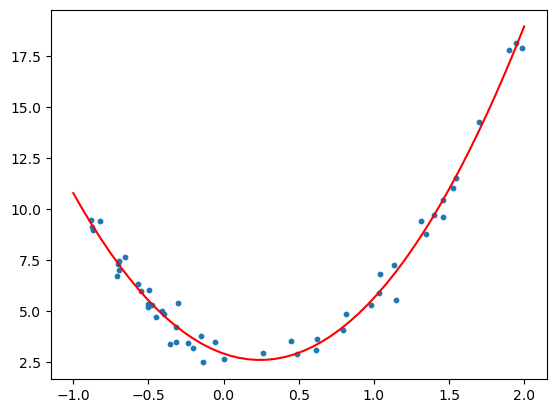

In [12]:
xs = np.linspace(-1,2,50)
ys = c[0] + c[1]*xs + c[2]*xs**2
plt.scatter(x,y,s=10)
plt.plot(xs,ys,'r')
plt.show()

## Tidal Data

Import tidal data:

In [13]:
import pandas as pd
data = pd.read_csv('tidal_data.csv')

In [14]:
data.head()

,Date,observations(m)
0,2022-06-07 12:54 PDT,2.94
1,2022-06-07 12:53 PDT,2.94
2,2022-06-07 12:52 PDT,2.95
3,2022-06-07 12:51 PDT,2.95
4,2022-06-07 12:50 PDT,2.95


In [15]:
y = data['observations(m)'].values

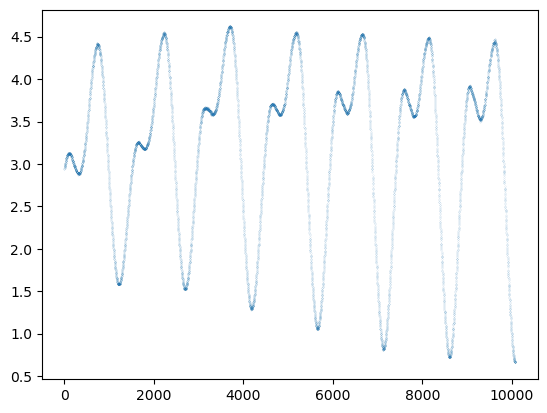

In [16]:
plt.plot(y,'.',ms=0.1)
plt.show()

Looks like the model is a sum of trigonometric function. We can see at least 2 frequencies. Let's assume the model is of the form:

$$
f(x) = c_0 + c_1 \sin(a x) + c_2 \cos(a x) + c_3 \sin(b x) + c_4 \cos(b x)
$$

$$
a = \frac{2 \pi}{750} \ , \ \ b = \frac{2 \pi}{1500}
$$

Construct the matrix $A$ and solve normal equations:

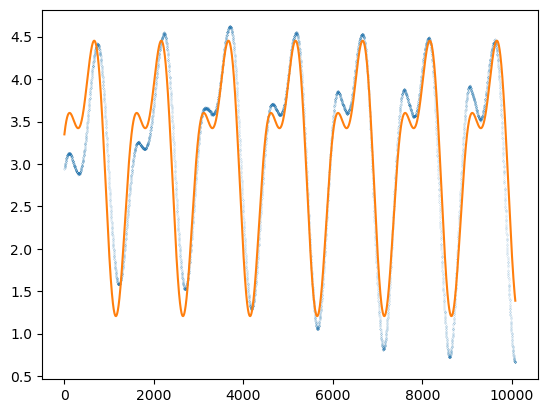

In [19]:
N = len(y)
a = 2*np.pi/750
b = 2*np.pi/1500
x = np.arange(0,N)
A = np.column_stack([np.ones(N),np.sin(a*x),np.cos(a*x),np.sin(b*x),np.cos(b*x)])
c = la.solve(A.T@A,A.T@y)
f = lambda x: c[0] + c[1]*np.sin(a*x) + c[2]*np.cos(a*x) + c[3]*np.sin(b*x) + c[4]*np.cos(b*x)
plt.plot(y,'.',ms=0.1)
plt.plot(x,f(x))
plt.show()